In [ ]:
!git clone https://github.com/ardamavi/Sign-Language-Digits-Dataset.git

Cloning into 'Sign-Language-Digits-Dataset'...
remote: Enumerating objects: 2095, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 2095 (delta 2), reused 0 (delta 0), pack-reused 2089 (from 1)
Receiving objects: 100% (2095/2095), 15.07 MiB | 23.66 MiB/s, done.
Resolving deltas: 100% (660/660), done.


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

In [ ]:
# Define data directory and labels
DATADIR = "/content/Sign-Language-Digits-Dataset/Dataset"
CATEGORIES = [str(i) for i in range(10)]  # labels: 0 to 9
IMG_SIZE = 64

# Load and preprocess images
data = []

for category in CATEGORIES:
    folder_path = os.path.join(DATADIR, category)
    label = int(category)
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        try:
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            data.append([img.flatten(), label])
        except:
            pass

# Shuffle data and split features and labels
np.random.shuffle(data)
X = np.array([i[0] for i in data])
y = np.array([i[1] for i in data])


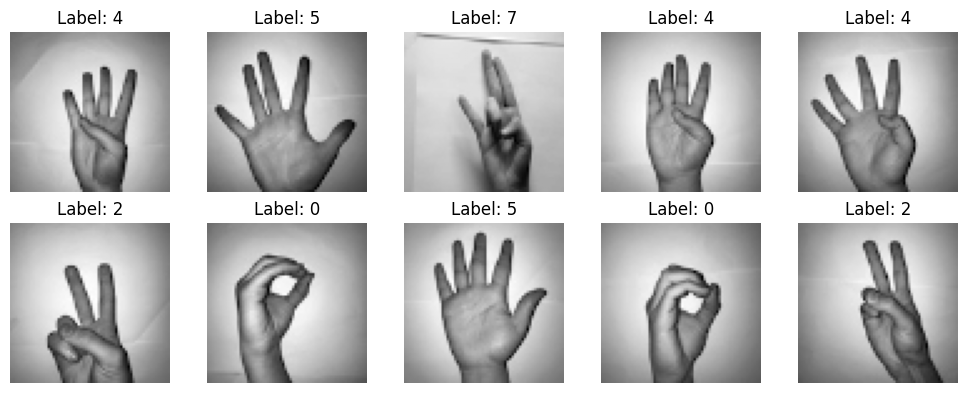

In [ ]:
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    img = X[i].reshape(IMG_SIZE, IMG_SIZE)
    plt.imshow(img, cmap='gray')
    plt.title(f"Label: {y[i]}")
    plt.axis("off")
plt.tight_layout()
plt.show()


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
svm_model = SVC(kernel='rbf', gamma='scale', C=10)
svm_model.fit(X_train, y_train)


SVC(C=10)

In [ ]:
y_pred = svm_model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"🔍 Model Accuracy: {acc * 100:.2f}%\n")
print("📊 Classification Report:\n", classification_report(y_test, y_pred))


🔍 Model Accuracy: 86.92%

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93        44
           1       0.88      0.93      0.90        41
           2       0.84      0.86      0.85        42
           3       0.94      0.87      0.90        38
           4       0.69      0.69      0.69        36
           5       0.98      0.89      0.93        45
           6       0.85      0.85      0.85        40
           7       0.81      0.80      0.80        44
           8       0.86      0.88      0.87        43
           9       0.90      0.95      0.93        40

    accuracy                           0.87       413
   macro avg       0.87      0.87      0.87       413
weighted avg       0.87      0.87      0.87       413



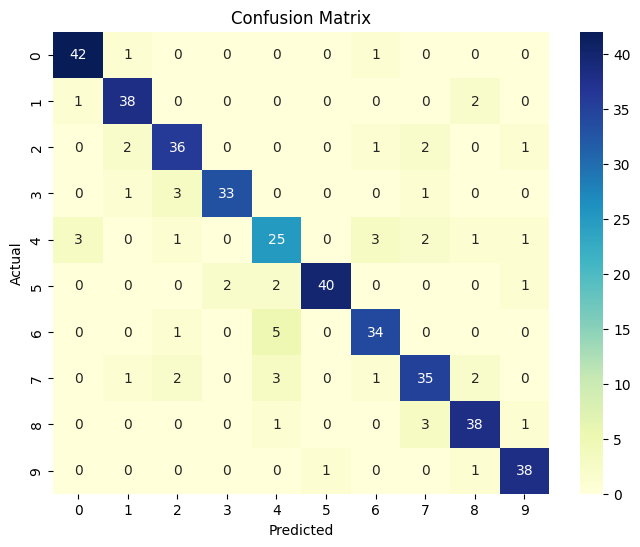

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='YlGnBu', xticklabels=CATEGORIES, yticklabels=CATEGORIES)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


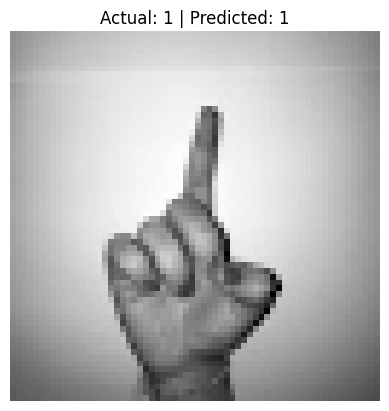

In [ ]:
idx = 10
plt.imshow(X_test[idx].reshape(IMG_SIZE, IMG_SIZE), cmap='gray')
plt.title(f"Actual: {y_test[idx]} | Predicted: {y_pred[idx]}")
plt.axis('off')
plt.show()
